<a href="https://colab.research.google.com/github/Tim3s/PL-teamproject-dataprocessing/blob/main/PL_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
user_profile_csv = pd.read_excel("drive/MyDrive/PL_team_project/user_profile.xlsx")
user_profile_csv.head()

,id,sex,age
0,228,F,80
1,230,F,73
2,232,M,84
3,273,F,83
4,276,F,56


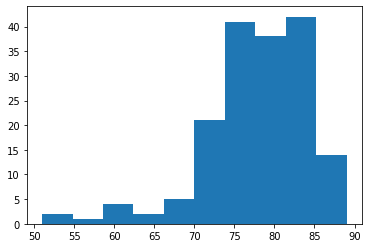

In [14]:
plt.hist(user_profile_csv['age'])
plt.show()

In [15]:
print(np.unique(user_profile_csv['sex'], return_counts=True))

(array(['F', 'M'], dtype=object), array([130,  40]))


In [16]:
import datetime as dt

In [28]:
state = np.array("TV 보기' '간식 먹기' '간편식 준비하기' '귀가하기' '기상 약 복용' '기상하기' '꿀잠소리' '날씨 확인하기' '낮잠 기상하기' '낮잠자기' '냉장고 정리하기' '노래자랑' '뉴스 시청' '늦은 기상하기' '도전 실버벨' '듣는대화' '마음그림터' '마음세탁소' '마음스트레칭' '명언산책' '무비순이' '밥솥 열기' '밥솥 정리하기' '새벽 TV 시청' '새벽 간식' '새벽 화장실 이용' '석식' '설거지 하기' '수면' '순이 특별대화' '순이극장' '순이대화' '순이인생' '순이책방' '순이체조' '시낭독' '시시콜콜' '식사' '식사 중 TV 시청' '식후 약 복용' '실내운동하기' '실외운동하기' '야식 먹기' '영어교실' '외출하기' '요가명상' '운동 후 귀가' '음식 꺼내기' '이른 기상하기' '일반 약 복용' '일어교실' '전자렌지 청소하기' '조식' '주방 정리하기' '중식' '집 환기하기' '취미활동' '화장실 이용".split("' '"))
active = np.array("냉장고' '리모콘' '매우 활동' '물' '미동' '밥솥' '변기' '부동' '식사 판단' '싱크대' '약' '외출' '전자렌지' '창문' '책상' '프로그램' '현관문' '화장실' '활동".split(' '))
print(state)
print(active)

['TV 보기' '간식 먹기' '간편식 준비하기' '귀가하기' '기상 약 복용' '기상하기' '꿀잠소리' '날씨 확인하기'
 '낮잠 기상하기' '낮잠자기' '냉장고 정리하기' '노래자랑' '뉴스 시청' '늦은 기상하기' '도전 실버벨' '듣는대화'
 '마음그림터' '마음세탁소' '마음스트레칭' '명언산책' '무비순이' '밥솥 열기' '밥솥 정리하기' '새벽 TV 시청'
 '새벽 간식' '새벽 화장실 이용' '석식' '설거지 하기' '수면' '순이 특별대화' '순이극장' '순이대화' '순이인생'
 '순이책방' '순이체조' '시낭독' '시시콜콜' '식사' '식사 중 TV 시청' '식후 약 복용' '실내운동하기' '실외운동하기'
 '야식 먹기' '영어교실' '외출하기' '요가명상' '운동 후 귀가' '음식 꺼내기' '이른 기상하기' '일반 약 복용'
 '일어교실' '전자렌지 청소하기' '조식' '주방 정리하기' '중식' '집 환기하기' '취미활동' '화장실 이용']
["냉장고'" "'리모콘'" "'매우" "활동'" "'물'" "'미동'" "'밥솥'" "'변기'" "'부동'" "'식사" "판단'"
 "'싱크대'" "'약'" "'외출'" "'전자렌지'" "'창문'" "'책상'" "'프로그램'" "'현관문'" "'화장실'"
 "'활동"]


In [52]:
user_profile = user_profile_csv.to_numpy()

In [62]:
active_input = []
# active = np.array([])
# state = np.array([])
valid = []
valid_age = []
invalid = []
small_data = []
num_of_conversation = []
no_pattern = []
pattern_valid = []
wake_valid = []
wake_input = []
break_valid = []
break_input = []
lunch_valid = []
lunch_input = []
dinner_valid = []
dinner_input = []
pattern_input = []

for ptr in range(len(user_profile_csv)):
    num = user_profile_csv['id'][ptr]
    try:
        data = pd.read_csv('drive/MyDrive/PL_team_project/hs_' + str(num) + '_m08_0903_1355.csv', encoding='cp949')
    except:
        invalid.append(num)
        print('not found:', num)
        continue

    tmp = pd.to_datetime(data['Time'])
    if len(tmp) <= 10:
        small_data.append(num)
        print('not enough data:', num)
        continue
    tmp = tmp[len(tmp)-1] - tmp[0]
    if tmp < dt.timedelta(seconds=86400):
        small_data.append(num)
        print('not enough data:', num)
        continue

    tmp = data['Z']
    tmp = [np.sum(np.sum((tmp=='매우 활동', tmp=='외출', tmp=='프로그램'), axis=0)>0),\
            np.sum(np.sum((data=='활동', data=='냉장고', data=='밥솥', data=='싱크대', data=='창문'), axis=0)>0),\
            np.sum(np.sum((data=='미동', data=='리모콘', data=='식사 판단', data=='약', data=='전자렌지'), axis=0)>0),\
            np.sum(np.sum((data=='부동', data=='변기'), axis=0)>0)]
    # ['냉장고' '리모콘' '매우 활동' '물' '미동' '밥솥' '변기' '부동' '식사 판단' '싱크대' '약' '외출' '전자렌지'
    # '창문' '프로그램' '현관문' '화장실' '활동']
    if not sum(tmp):
        small_data.append(num)
        print('not enough data:', num)
        continue
    active_input.append((sum([tmp[i] * (4 - i) for i in range(4)]) / sum(tmp)))

    tmp = data['State'].to_numpy()
    if ('기상하기' not in tmp) and ('늦은 기상하기' not in tmp) and ('조식' not in tmp) and ('중식' not in tmp) and ('석식' not in tmp):
        no_pattern.append(num)
    else:
        pattern_valid.append(num)
        if ('기상하기' in tmp) or ('늦은 기상하기' in tmp):
            wake_valid.append(num)
            current = []
            for i in range(len(tmp)):
                if tmp[i] == '기상하기' or tmp[i] == '늦은 기상하기':
                    current.append(pd.to_datetime(data['Time'][i]).to_pydatetime())
                    current[-1] = dt.timedelta(hours=(current[-1].hour if current[-1].hour < 12 else -24 + current[-1].hour), minutes=current[-1].minute).seconds
            wake_input.append(np.std(current))
        if '조식' in tmp:
            break_valid.append(num)
            current = []
            for i in range(len(tmp)):
                if tmp[i] == '조식':
                    current.append(pd.to_datetime(data['Time'][i]).to_pydatetime())
                    current[-1] = dt.timedelta(hours=current[-1].hour, minutes=current[-1].minute).seconds
            break_input.append(np.std(current))
        if '중식' in tmp:
            lunch_valid.append(num)
            current = []
            for i in range(len(tmp)):
                if tmp[i] == '중식':
                    current.append(pd.to_datetime(data['Time'][i]).to_pydatetime())
                    current[-1] = dt.timedelta(hours=current[-1].hour, minutes=current[-1].minute).seconds
            lunch_input.append(np.std(current))
        if '석식' in tmp:
            dinner_valid.append(num)
            current = []
            for i in range(len(tmp)):
                if tmp[i] == '석식':
                    current.append(pd.to_datetime(data['Time'][i]).to_pydatetime())
                    current[-1] = dt.timedelta(hours=current[-1].hour, minutes=current[-1].minute).seconds
            dinner_input.append(np.std(current))

    tmp = [len(data['STT_1'].dropna()), len(data['STT_2'].dropna()), len(data['STT_3'].dropna())]
    response = len([i for i in data['Message_1'].dropna() if i != '프로그램 메시지'])
    tmp.append(tmp[0] / response * 100 if response else 100)
    response = len([i for i in data['Message_2'].dropna() if i != '프로그램 메시지'])
    tmp.append(tmp[1] / response * 100 if response else 100)
    response = len([i for i in data['Message_3'].dropna() if i != '프로그램 메시지'])
    tmp.append(tmp[2] / response * 100 if response else 100)
    num_of_conversation.append(tmp)

    # state = np.unique(np.concatenate((np.unique(data['State']), state)))
    # active = np.unique(np.concatenate((active, data['Z'].dropna())))
    valid.append(num)
    valid_age.append(user_profile_csv['age'][ptr])

wake_input = np.array(wake_input) / max(wake_input)
break_input = np.array(break_input) / max(break_input)
lunch_input = np.array(lunch_input) / max(lunch_input)
dinner_input = np.array(dinner_input) / max(dinner_input)
wakeptr = breakptr = lunchptr = dinnerptr = 0
for num in pattern_valid:
    current = []
    if wakeptr < len(wake_valid) and wake_valid[wakeptr] == num:
        current.append(1 - wake_input[wakeptr])
        wakeptr += 1
    if breakptr < len(break_valid) and break_valid[breakptr] == num:
        current.append(1 - break_input[breakptr])
        breakptr += 1
    if lunchptr < len(lunch_valid) and lunch_valid[lunchptr] == num:
        current.append(1 - lunch_input[lunchptr])
        lunchptr += 1
    if dinnerptr < len(dinner_valid) and dinner_valid[dinnerptr] == num:
        current.append(1 - dinner_input[dinnerptr])
        dinnerptr += 1
    pattern_input.append(np.mean(current) * 100)

active_input = np.array(active_input)
state.sort()
# print(state)
# active.sort()
# print(active)
print(valid)
print(pattern_valid)
print(pattern_input)
print(len(no_pattern), no_pattern)
print(len(wake_valid), len(break_valid), len(lunch_valid), len(dinner_valid))
print(np.max(wake_input), np.max(break_input), np.max(lunch_input), np.max(dinner_input))

not enough data: 273
not enough data: 342
not enough data: 504
not enough data: 509
not enough data: 530
not enough data: 532
not enough data: 537
not enough data: 538
not enough data: 540
not enough data: 552
not enough data: 574
not enough data: 633
not enough data: 635
not enough data: 636
not enough data: 653
not enough data: 664
not enough data: 667
not enough data: 732
not enough data: 804
not enough data: 808
not enough data: 1011
not enough data: 1034
not enough data: 1039
not enough data: 1045
not enough data: 1056
not enough data: 30043
not enough data: 30044
not enough data: 30047
not enough data: 30049
not enough data: 30052
not enough data: 30059
not enough data: 30061
not enough data: 30062
not found: 30064
not found: 30066
not found: 30067
not found: 30069
not found: 30070
not found: 30071
not found: 30072
not found: 30073
not found: 30074
not found: 30075
not found: 30076
not found: 30077
not found: 30078
not found: 30079
[228, 230, 232, 276, 315, 339, 341, 476, 477, 47

In [50]:
print(np.mean(num_of_conversation, axis=0), np.std(num_of_conversation, axis=0))
print(np.max(num_of_conversation, axis=0))

[12.77235772  3.43902439  0.99186992 17.47974389 55.3959605  83.4795071 ] [23.27733571  7.81612503  2.61171823 31.35067627 38.14606185 28.59086032]
[153.  60.  22. 100. 100. 100.]


67.43575251208263 10.425547402897973 100.0
1036


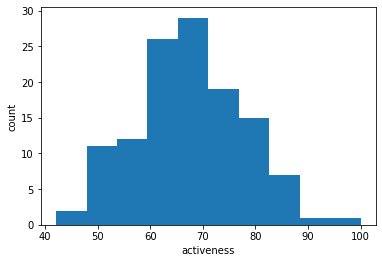

In [66]:
active_input = active_input / np.max(active_input) * 100
print(np.mean(active_input), np.std(active_input), np.max(active_input))
print(valid[np.argmax(active_input)])
plt.hist(active_input)
plt.xlabel('activeness')
plt.ylabel('count')
plt.show()
# active_input /= np.max(active_input)

56 89


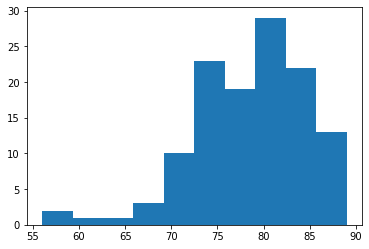

In [64]:
plt.hist(valid_age)
print(np.min(valid_age), np.max(valid_age))

In [68]:
fifty_active = []
sixty_active = []
seventy_active = []
eighty_active = []
for i in range(len(valid_age)):
    if valid_age[i] < 60:
        fifty_active.append(active_input[i])
    elif valid_age[i] < 70:
        sixty_active.append(active_input[i])
    elif valid_age[i] < 80:
        seventy_active.append(active_input[i])
    else:
        eighty_active.append(active_input[i])

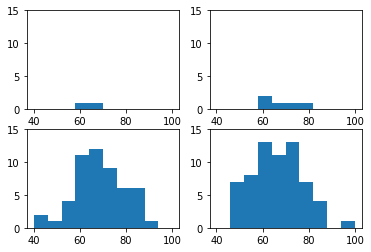

In [71]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(fifty_active, range=(40, 100))
axs[0, 0].set_ylim((0, 15))
axs[0, 1].hist(sixty_active, range=(40, 100))
axs[0, 1].set_ylim((0, 15))
axs[1, 0].hist(seventy_active, range=(40, 100))
axs[1, 0].set_ylim((0, 15))
axs[1, 1].hist(eighty_active, range=(40, 100))
axs[1, 1].set_ylim((0, 15))
plt.show()

In [29]:
state_input = np.empty(shape=(0, len(state)))
for num in valid:
    data = pd.read_csv('drive/MyDrive/PL_team_project/hs_' + str(num) + '_m08_0903_1355.csv', encoding='cp949')
    result = np.sum([state==i for i in data['State']], axis=0)
    result = result / np.sum(result)
    # print(result)
    # print(np.array([result]))
    # print(state_input)
    state_input = np.append(state_input, np.array([result]), axis=0)

In [30]:
print(state)
print(state_input)

['TV 보기' '간식 먹기' '간편식 준비하기' '귀가하기' '기상 약 복용' '기상하기' '꿀잠소리' '날씨 확인하기'
 '낮잠 기상하기' '낮잠자기' '냉장고 정리하기' '노래자랑' '뉴스 시청' '늦은 기상하기' '도전 실버벨' '듣는대화'
 '마음그림터' '마음세탁소' '마음스트레칭' '명언산책' '무비순이' '밥솥 열기' '밥솥 정리하기' '새벽 TV 시청'
 '새벽 간식' '새벽 화장실 이용' '석식' '설거지 하기' '수면' '순이 특별대화' '순이극장' '순이대화' '순이인생'
 '순이책방' '순이체조' '시낭독' '시시콜콜' '식사' '식사 중 TV 시청' '식후 약 복용' '실내운동하기' '실외운동하기'
 '야식 먹기' '영어교실' '외출하기' '요가명상' '운동 후 귀가' '음식 꺼내기' '이른 기상하기' '일반 약 복용'
 '일어교실' '전자렌지 청소하기' '조식' '주방 정리하기' '중식' '집 환기하기' '취미활동' '화장실 이용']
[[0.         0.0070922  0.         ... 0.0141844  0.28368794 0.        ]
 [0.25       0.15277778 0.175      ... 0.         0.025      0.        ]
 [0.         0.26648352 0.06868132 ... 0.22802198 0.         0.        ]
 ...
 [0.09751037 0.02697095 0.         ... 0.00207469 0.08091286 0.03526971]
 [0.17175573 0.00954198 0.00572519 ... 0.00572519 0.18129771 0.01145038]
 [0.03836317 0.02429668 0.         ... 0.         0.10230179 0.        ]]


In [31]:
from sklearn.cluster import KMeans

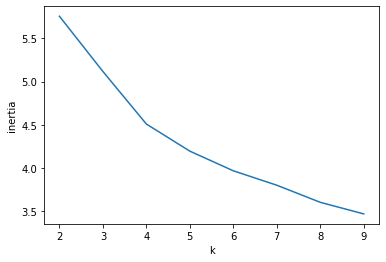

In [32]:
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(state_input)
    inertia.append(km.inertia_)
plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

[  315   341   505   511   513   546   650   665   673   760  1001  1013
  1019  1020  1022  1030  1050  1054 30048 30050 30053 30055 30056 30063]
[  230   490   494   495   512   518   519   534   536   581   644   672
   720   768   796   800   802   806   811   812  1003  1004  1012  1018
  1021  1026  1028  1032  1033  1040  1042  1052  1055  1057  1059  1061
  1062 30016 30035 30038 30039 30041 30044 30046]
[  228   339   477   488   492   496   527   547   580   582   583   642
   656   661   662   705  1015  1027  1029  1037  1043  1047 30058]
[  232   276   476   479   486   520   535   542   544   570   585   654
   655   658   668   797   799   801   803   805   807   809   813  1002
  1008  1009  1016  1036  1046  1048  1053 30040 30045]
num of people in cluster: 24
mostly done activity: 외출하기


num of people in cluster: 44
mostly done activity: TV 보기


num of people in cluster: 23
mostly done activity: 취미활동


num of people in cluster: 33
mostly done activity: 음식 꺼내기




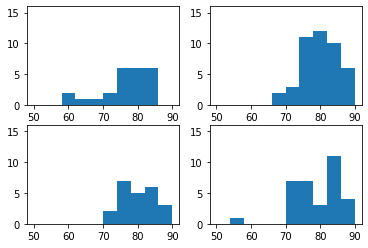

In [33]:
km = KMeans(n_clusters=4)
km.fit(state_input)
valid = np.array(valid)
for i in range(km.n_clusters):
    print(valid[km.labels_==i])
for i in range(km.n_clusters):
    print('num of people in cluster:', np.sum(km.labels_==i))
    print('mostly done activity:', state[np.argmax(np.mean(state_input[km.labels_==i], axis=0))])
    # print(np.round(np.mean(state_input[km.labels_==i], axis=0), 3))
    # print(np.round(np.std(state_input[km.labels_==i], axis=0), 3))
    print('\n')
user_profile = user_profile_csv.to_numpy()
fig, axs = plt.subplots((km.n_clusters + 1) // 2, 2)
for i in range(km.n_clusters):
    tmp = valid[km.labels_==i]
    axs[i // 2, i % 2].hist([user_profile[j][2] for j in range(len(user_profile)) if user_profile[j][0] in tmp], range=(50, 90))
    axs[i // 2, i % 2].set_ylim([0, 16])
plt.show()

In [34]:
np.mean([dt.timedelta(hours=1), dt.timedelta(hours=2)])

datetime.timedelta(seconds=5400)